In [ ]:
!pip list

Package                          Version
-------------------------------- -------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd                 

In [ ]:
import numpy as np
import torch

In [ ]:
USE_CUDA = torch.cuda.is_available()
print(USE_CUDA)

False


In [ ]:
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cpu


In [ ]:
import torch
import pickle
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/dataset/broken_image_t.p -O ./broken_image_t.p

--2024-10-01 02:26:05--  https://raw.githubusercontent.com/aidalabs/Lectures/master/LectureFiles/dataset/broken_image_t.p
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80162 (78K) [application/octet-stream]
Saving to: ‘./broken_image_t.p’

./broken_image_t.p  100%[===================>]  78.28K  --.-KB/s    in 0.05s   

2024-10-01 02:26:06 (1.52 MB/s) - ‘./broken_image_t.p’ saved [80162/80162]



In [ ]:
shp_original_img = (100, 100)
broken_image =  torch.FloatTensor( pickle.load(open('./broken_image_t.p', 'rb'),encoding='latin1' ) )

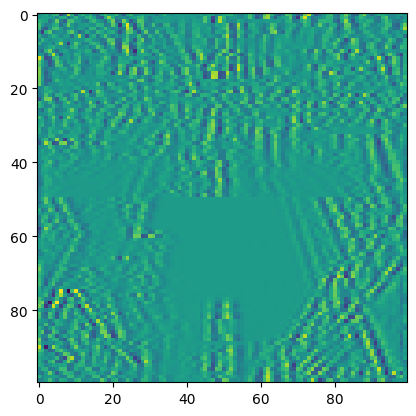

In [ ]:
plt.imshow(broken_image.view(100,100))

In [ ]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0*0])
        h_l = torch.cat( (zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0 )
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat( (h[h.shape[0]//2:],h[:h.shape[0]//2]), 0  )
    return h

In [ ]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)

In [ ]:
random_tensor = torch.randn(10000, dtype = torch.float)

In [ ]:
lr = 0.8
for i in range(0,20000):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, broken_image)
    loss.backward()
    with torch.no_grad():
        random_tensor = random_tensor - lr*random_tensor.grad
    if i % 1000 == 0:
        print('Loss at {} = {}'.format(i, loss.item()))

Loss at 0 = 12.183793067932129
Loss at 1000 = 1.14370858669281
Loss at 2000 = 0.5459152460098267
Loss at 3000 = 0.3802263140678406
Loss at 4000 = 0.3006412386894226
Loss at 5000 = 0.2517550587654114
Loss at 6000 = 0.21657291054725647
Loss at 7000 = 0.1885875016450882
Loss at 8000 = 0.16486476361751556
Loss at 9000 = 0.14387868344783783
Loss at 10000 = 0.12475211918354034
Loss at 11000 = 0.10694576799869537
Loss at 12000 = 0.09011127054691315
Loss at 13000 = 0.07401416450738907
Loss at 14000 = 0.05849173665046692
Loss at 15000 = 0.043428681790828705
Loss at 16000 = 0.02874406985938549
Loss at 17000 = 0.02115604840219021
Loss at 18000 = 0.021165991201996803
Loss at 19000 = 0.021167414262890816


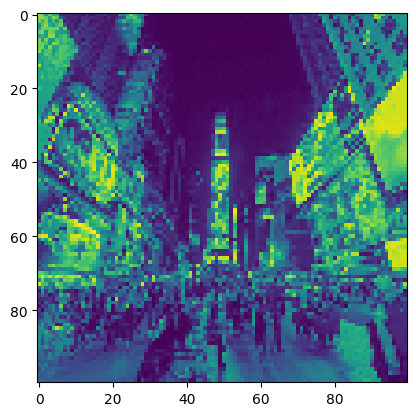

In [ ]:
plt.imshow(random_tensor.view(100,100).data)

In [ ]:
from sklearn.datasets import make_blobs
import numpy

In [ ]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1,1],[-1,-1],[1,-1],[-1,1]], shuffle=True, cluster_std=0.3)

In [ ]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

In [ ]:
y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

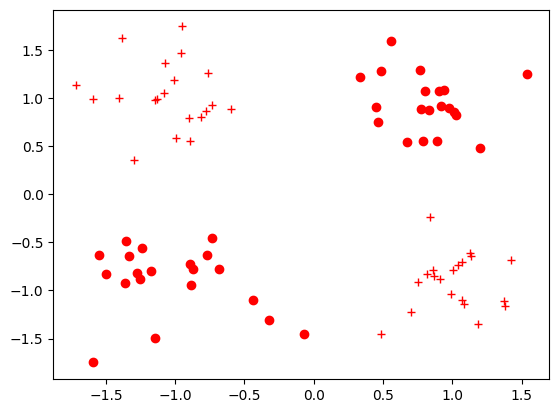

In [ ]:
def vis_data(x,y = None, c = 'r'):
    if y is None:
        y = [None] * len(x)
    for x_, y_ in zip(x,y):
        if y_ is None:
            plt.plot(x_[0], x_[1], '*',markerfacecolor='none', markeredgecolor=c)
        else:
            plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [ ]:
x_train = torch.FloatTensor(x_train)
print(x_train.shape)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

torch.Size([80, 2])


In [ ]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.hidden_size  = hidden_size
        self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [ ]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.7080131769180298


In [ ]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.7062457799911499
Train loss at 100 is 0.6455497145652771
Train loss at 200 is 0.5759230852127075
Train loss at 300 is 0.49010783433914185
Train loss at 400 is 0.4060593247413635
Train loss at 500 is 0.3341696262359619
Train loss at 600 is 0.27720654010772705
Train loss at 700 is 0.23277691006660461
Train loss at 800 is 0.1988701969385147
Train loss at 900 is 0.17195670306682587
Train loss at 1000 is 0.15023578703403473
Train loss at 1100 is 0.13248620927333832
Train loss at 1200 is 0.11821333318948746
Train loss at 1300 is 0.1064043864607811
Train loss at 1400 is 0.09672828018665314
Train loss at 1500 is 0.08853920549154282
Train loss at 1600 is 0.08151556551456451
Train loss at 1700 is 0.07542622089385986
Train loss at 1800 is 0.07009418308734894
Train loss at 1900 is 0.0653923749923706


In [ ]:
model.eval()
test_loss = criterion(torch.squeeze(model(x_test)), y_test)
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.11029370129108429


In [ ]:
torch.save(model.state_dict(), './model.pt')
print('state_dict format of the model: {}'.format(model.state_dict()))

state_dict format of the model: OrderedDict([('linear_1.weight', tensor([[-0.8500,  0.5660],
        [ 1.2712, -1.3744],
        [-1.0050, -1.4094],
        [ 1.0953, -1.1693],
        [-1.8326,  1.2243]])), ('linear_1.bias', tensor([-0.2375, -0.2816,  0.2530, -0.2600, -0.5470])), ('linear_2.weight', tensor([[ 0.9799,  1.8678, -1.5399,  1.5530,  2.2019]])), ('linear_2.bias', tensor([-2.3605]))])


In [ ]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('벡터 [-1, 1]이 레이블 1을 가질 확률은 {}'.format(new_model(torch.FloatTensor([-1,1])).item()))

벡터 [-1, 1]이 레이블 1을 가질 확률은 0.9868877530097961


<ipython-input-26-280a5852a23d>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('./model.pt'))


In [ ]:
from torchvision import datasets, transforms, utils
from torch.utils import data

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
trainset = datasets.FashionMNIST(
    root      = './.data/',
    train     = True,
    download  = True,
    transform = transform
)
testset = datasets.FashionMNIST(
    root      = './.data/',
    train     = False,
    download  = True,
    transform = transform
)

100%|██████████| 26421880/26421880 [00:07<00:00, 3541508.26it/s]


Extracting ./.data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 246181.12it/s]


Extracting ./.data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 940625.97it/s] 


Extracting ./.data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./.data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6741266.62it/s]

Extracting ./.data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./.data/FashionMNIST/raw



In [ ]:
batch_size = 16

train_loader = data.DataLoader(
    dataset     = trainset,
    batch_size  = batch_size
)
test_loader = data.DataLoader(
    dataset     = testset,
    batch_size  = batch_size
)

In [ ]:
dataiter       = iter(train_loader)
images, labels = next(dataiter)

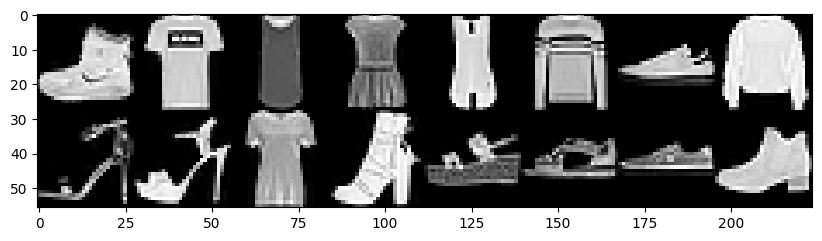

In [ ]:
img   = utils.make_grid(images, padding=0)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1,2,0)))
plt.show()

In [ ]:
print(labels)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9])


In [ ]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}


for label in labels:
    index = label.item()
    print(CLASSES[index])

Ankle boot
T-shirt/top
T-shirt/top
Dress
T-shirt/top
Pullover
Sneaker
Pullover
Sandal
Sandal
T-shirt/top
Ankle boot
Sandal
Sandal
Sneaker
Ankle boot


(28, 28)


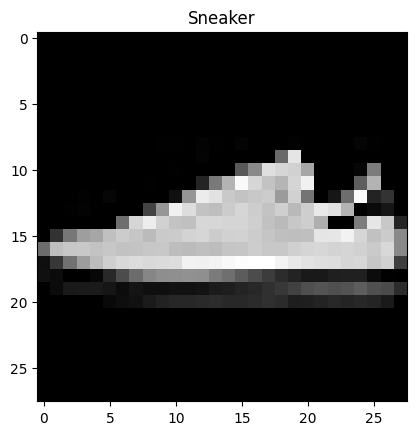

In [ ]:
idx = 6

item_img = images[idx]
item_npimg = item_img.squeeze().numpy()
plt.title(CLASSES[labels[idx].item()])
print(item_npimg.shape)
plt.imshow(item_npimg, cmap='gray')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
print(DEVICE)

cpu


In [ ]:
EPOCHS = 30
BATCH_SIZE = 64

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
trainset = datasets.FashionMNIST(
    root      = './.data/',
    train     = True,
    download  = True,
    transform = transform
)

testset = datasets.FashionMNIST(
    root      = './.data/',
    train     = False,
    download  = True,
    transform = transform
)

train_loader = torch.utils.data.DataLoader(
    dataset     = trainset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

test_loader = torch.utils.data.DataLoader(
    dataset     = testset,
    batch_size  = BATCH_SIZE,
    shuffle     = True,
)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model        = Net().to(DEVICE)
optimizer    = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # 학습 데이터를 DEVICE의 메모리로 보냄
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)

            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.8434, Accuracy: 68.20%
[2] Test Loss: 0.6688, Accuracy: 75.94%
[3] Test Loss: 0.6119, Accuracy: 77.00%
[4] Test Loss: 0.5358, Accuracy: 81.22%
[5] Test Loss: 0.5160, Accuracy: 81.70%
[6] Test Loss: 0.4973, Accuracy: 82.24%
[7] Test Loss: 0.4832, Accuracy: 82.63%
[8] Test Loss: 0.4815, Accuracy: 82.87%
[9] Test Loss: 0.4800, Accuracy: 82.55%
[10] Test Loss: 0.4704, Accuracy: 83.36%
[11] Test Loss: 0.4557, Accuracy: 83.79%
[12] Test Loss: 0.4562, Accuracy: 84.21%
[13] Test Loss: 0.5369, Accuracy: 79.66%
[14] Test Loss: 0.4291, Accuracy: 84.70%
[15] Test Loss: 0.4225, Accuracy: 85.02%
[16] Test Loss: 0.4208, Accuracy: 85.08%
[17] Test Loss: 0.4187, Accuracy: 85.00%
[18] Test Loss: 0.4186, Accuracy: 85.25%
[19] Test Loss: 0.4182, Accuracy: 85.08%
[20] Test Loss: 0.4185, Accuracy: 84.93%
[21] Test Loss: 0.4043, Accuracy: 85.66%
[22] Test Loss: 0.4031, Accuracy: 85.49%
[23] Test Loss: 0.4019, Accuracy: 85.72%
[24] Test Loss: 0.3959, Accuracy: 86.12%
[25] Test Loss: 0.4047, A

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

In [ ]:
print(DEVICE)

cpu


In [ ]:
EPOCHS = 50
BATCH_SIZE = 64

In [ ]:
train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=True,
                   download=True,
                   transform=transforms.Compose([
                       transforms.RandomHorizontalFlip(),
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./.data',
                   train=False,
                   download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
class Net(nn.Module):
    def __init__(self, dropout_p=0.2):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.dropout_p = dropout_p

    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, training=self.training,
                      p=self.dropout_p)
        x = self.fc3(x)
        return x

In [ ]:
model = Net(dropout_p=0.2).to(DEVICE)
optimizer= optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            test_loss += F.cross_entropy(output, target,
                                         reduction='sum').item()

            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [ ]:
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)

    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(
          epoch, test_loss, test_accuracy))

[1] Test Loss: 0.6428, Accuracy: 77.43%
[2] Test Loss: 0.5311, Accuracy: 80.52%
[3] Test Loss: 0.4881, Accuracy: 82.19%
[4] Test Loss: 0.4635, Accuracy: 82.89%
[5] Test Loss: 0.4402, Accuracy: 83.83%
[6] Test Loss: 0.4230, Accuracy: 84.81%
[7] Test Loss: 0.4145, Accuracy: 84.89%
[8] Test Loss: 0.4137, Accuracy: 85.08%
[9] Test Loss: 0.3981, Accuracy: 85.56%
[10] Test Loss: 0.3881, Accuracy: 85.80%
[11] Test Loss: 0.3912, Accuracy: 85.79%
[12] Test Loss: 0.3777, Accuracy: 86.18%
[13] Test Loss: 0.3714, Accuracy: 86.46%
[14] Test Loss: 0.3708, Accuracy: 86.39%
[15] Test Loss: 0.3648, Accuracy: 86.76%
[16] Test Loss: 0.3605, Accuracy: 86.78%
[17] Test Loss: 0.3578, Accuracy: 86.99%
[18] Test Loss: 0.3574, Accuracy: 87.11%
[19] Test Loss: 0.3583, Accuracy: 86.77%
[20] Test Loss: 0.3518, Accuracy: 87.28%
[21] Test Loss: 0.3426, Accuracy: 87.54%
[22] Test Loss: 0.3455, Accuracy: 87.39%
[23] Test Loss: 0.3402, Accuracy: 87.68%
[24] Test Loss: 0.3431, Accuracy: 87.74%
[25] Test Loss: 0.3403, A

# TensorFlow 시작